Python 3.12.4 on my machine

# IMPORTS

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# MNIST Dataset

In [3]:
# manually load dataset 
# data = np.load('./datasets/mnist.npz')          # n times of 28x28 matrices
# x_train, x_test = data['x_train'], data['x_test']
(x_train, _), (x_test, _) = mnist.load_data()       # _ is set for y, because it is said what number it is - no need for it now

# Normalizing 32 bit values - from [0, 255] to [0, 1]
# Firstly, from integer value to float32 value
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape, x_test.shape)

# print("We want to combine 2nd and 3rd dimensions to get 28*28 =", 28*28, "for our input space of neural network.")
# x_train = x_train.reshape(len(x_train), x_train.shape[1]**2)
# x_test = x_test.reshape(len(x_test), x_test.shape[1]**2)

print("We want to have n number of examples of 28*28 pixel images - 1 stands for 1 color (greyscale image).")  # 4 dimensions
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28) (10000, 28, 28)
We want to have n number of examples of 28*28 pixel images - 1 stands for 1 color (greyscale image).
(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Add artificial noise

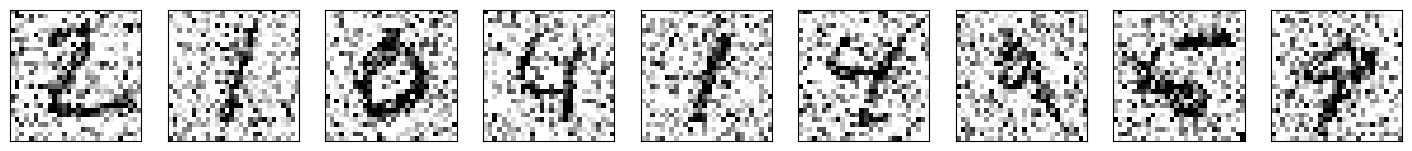

In [4]:
# Random noise from normal distribution with mean at 0 and std dev of 1
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip all values to be between 0 and 1 - ako je vise od 1, bice 1 (nije skaliranje)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Display images with noise
plt.figure(figsize=(20, 2))
for i in range(1, 10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='binary')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Creating the Architecture of an Autoencoder

In [5]:
# Kreiramo encoder model koristeći Input kao prvi sloj
encoder = Sequential()
encoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

encoder.add(MaxPooling2D((2, 2), padding='same'))

# Kreiramo decoder model
decoder = Sequential()
decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(32, (3, 3), activation='relu'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

# This model maps an input to its reconstruction
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

autoencoder.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 4, 4, 8)        │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │         3,793 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8009 - loss: 0.0669 - val_accuracy: 0.7996 - val_loss: 0.0401
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.7998 - loss: 0.0385 - val_accuracy: 0.8038 - val_loss: 0.0344
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8029 - loss: 0.0333 - val_accuracy: 0.8035 - val_loss: 0.0307
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8044 - loss: 0.0305 - val_accuracy: 0.7998 - val_loss: 0.0299
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8045 - loss: 0.0289 - val_accuracy: 0.8049 - val_loss: 0.0272
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8052 - loss: 0.0273 - val_accuracy: 0.8069 - val_loss: 0.0263
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8067 - loss: 0.0262 - val_accuracy: 0.8065 - val_loss: 0.0252
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8068 - loss: 0.0254 - 

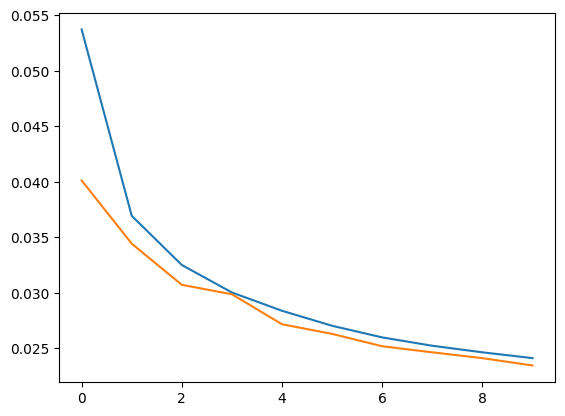

In [6]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

autoencoder.evaluate(x_test_noisy, x_test)
plt.plot(history.history['loss'])           # na trening setu
plt.plot(history.history['val_loss'])       # na validation setu

In [7]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy)
predicted = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


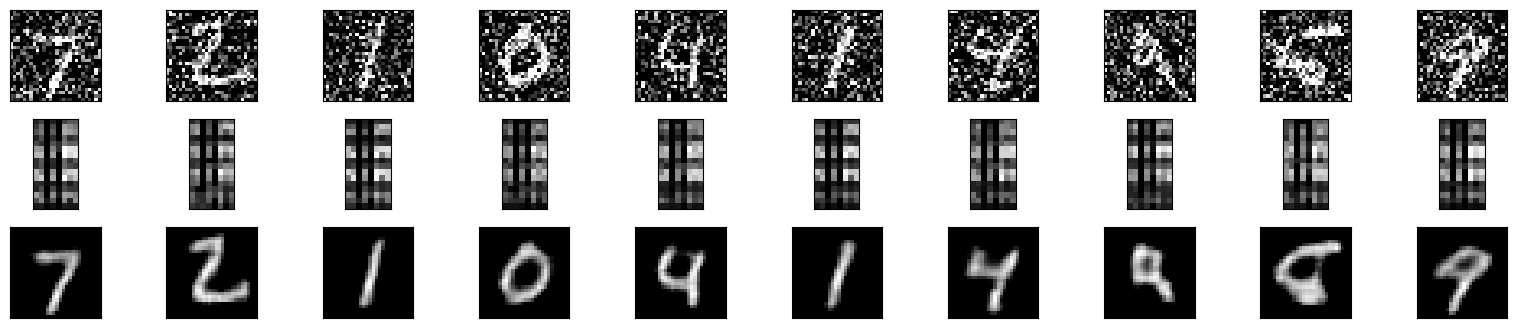

In [8]:
n = 10  # How many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, 20, 2*20 + i + 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()